### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
wine = pd.read_csv('wine.csv')

### Performing EDA on dataset
Now, I will explore the data to gain insights about the data. 

In [3]:
# preview the dataset
# Display first 5 records

wine.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [4]:
# Display last 5 records

wine.tail()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
173           0.52             1.06    7.7  0.64      1.74      740  
174           0.43             1.41    7.3  0.70      1.56      750  
175           0.43             1.35   10.2  0.59      1.56      835  
176           0.53             1.46    9.3  0.60      1.62      840  
177           0.56             1.35    9.2  0.61      1.60      560

In [5]:
# view dimensions of dataset

wine.shape 

(178, 14)

##### Dataset has 178 rows and 14 columns

In [6]:
# View summary of data

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
# Check missing values in variables

wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### There is no any null value in dataset

### Explore Type variable

In [8]:
 wine_val=wine['Type'].value_counts()
wine_val

2    71
1    59
3    48
Name: Type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

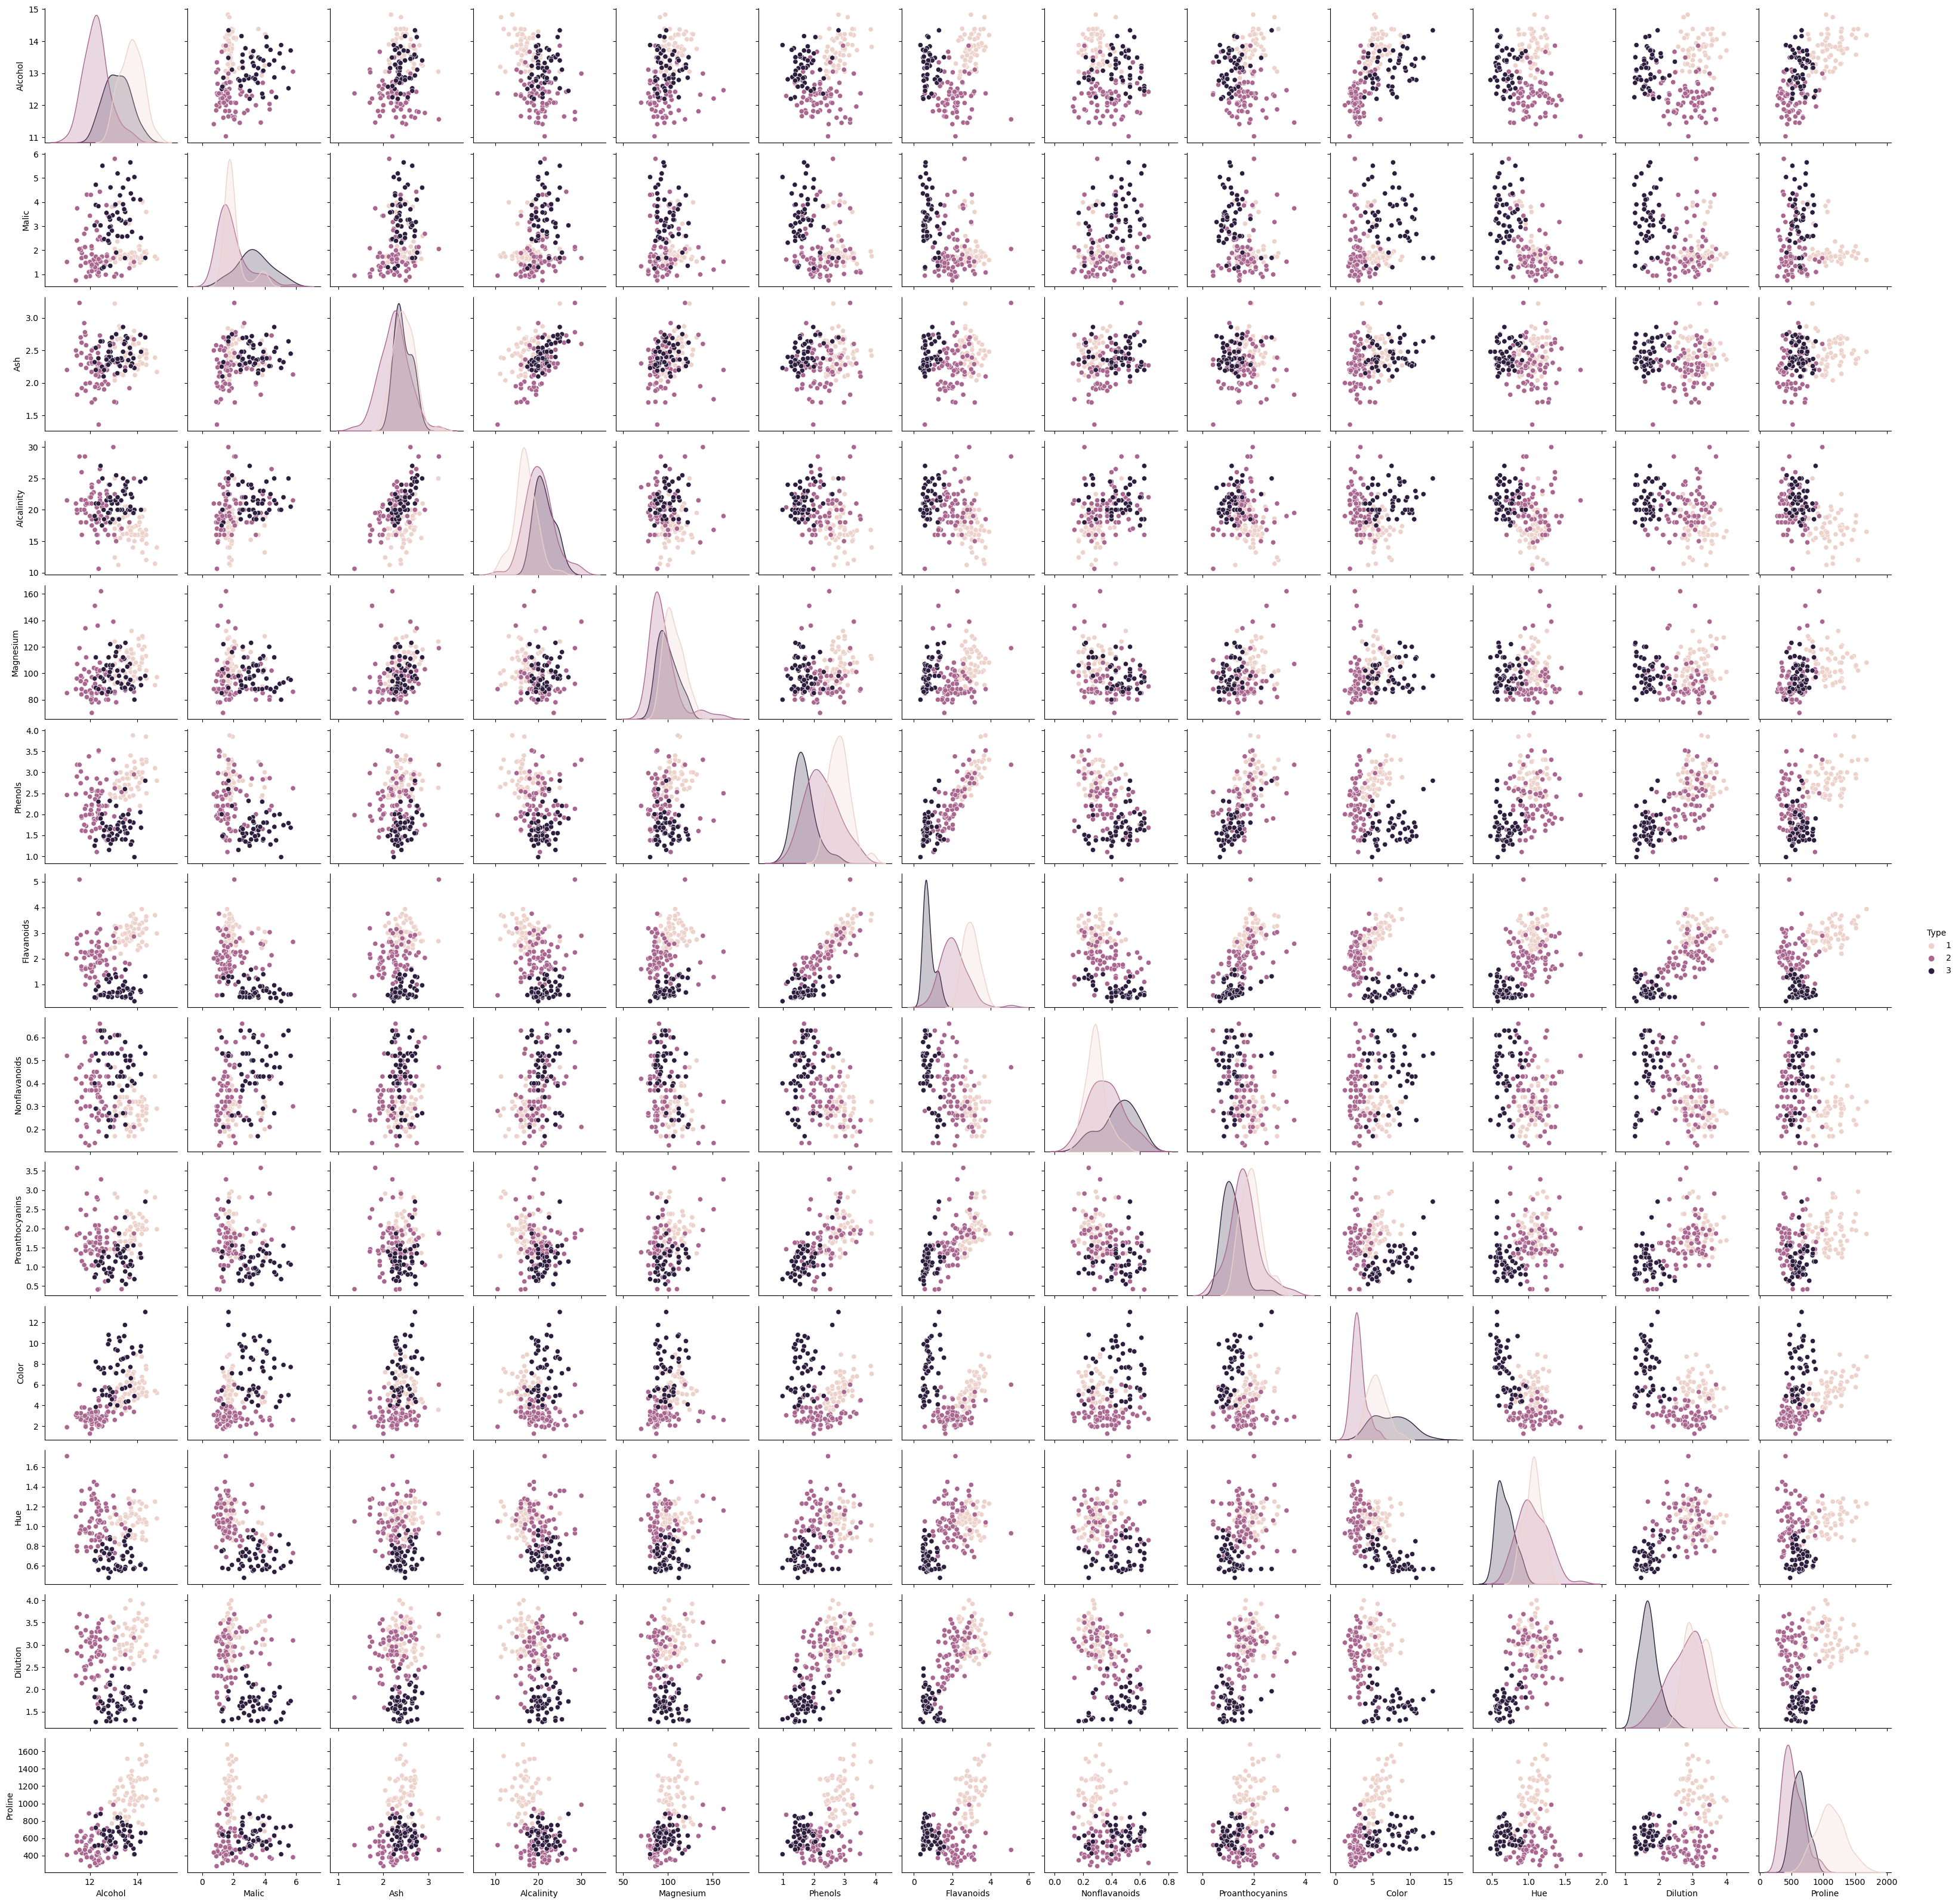

In [9]:
#displaying pairplot to check relationship

plt.figure(figsize=(10,5))
sns.pairplot(wine,hue='Type')
plt.show

#### All the data with respect to type is skewed.So,we cant asume any conclusions from the above graoh.

In [10]:
wine_df=wine.iloc[:,1:] #we are eliminating the Type column

In [11]:
wine_df.head()

Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0    14.23   1.71  2.43        15.6        127     2.80        3.06   
1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2    13.16   2.36  2.67        18.6        101     2.80        3.24   
3    14.37   1.95  2.50        16.8        113     3.85        3.49   
4    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

In [12]:
# view dimensions of dataset

wine_df.shape

(178, 13)

In [13]:
# let's again preview the dataset

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [14]:
wine_df.values

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
# Check Mathematical calculations

wine_df.describe() 

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

In [16]:
#checking for duplication of data

wine_df[wine_df.duplicated()].shape

(0, 13)

#### There is no any duplicate value 

<AxesSubplot:>

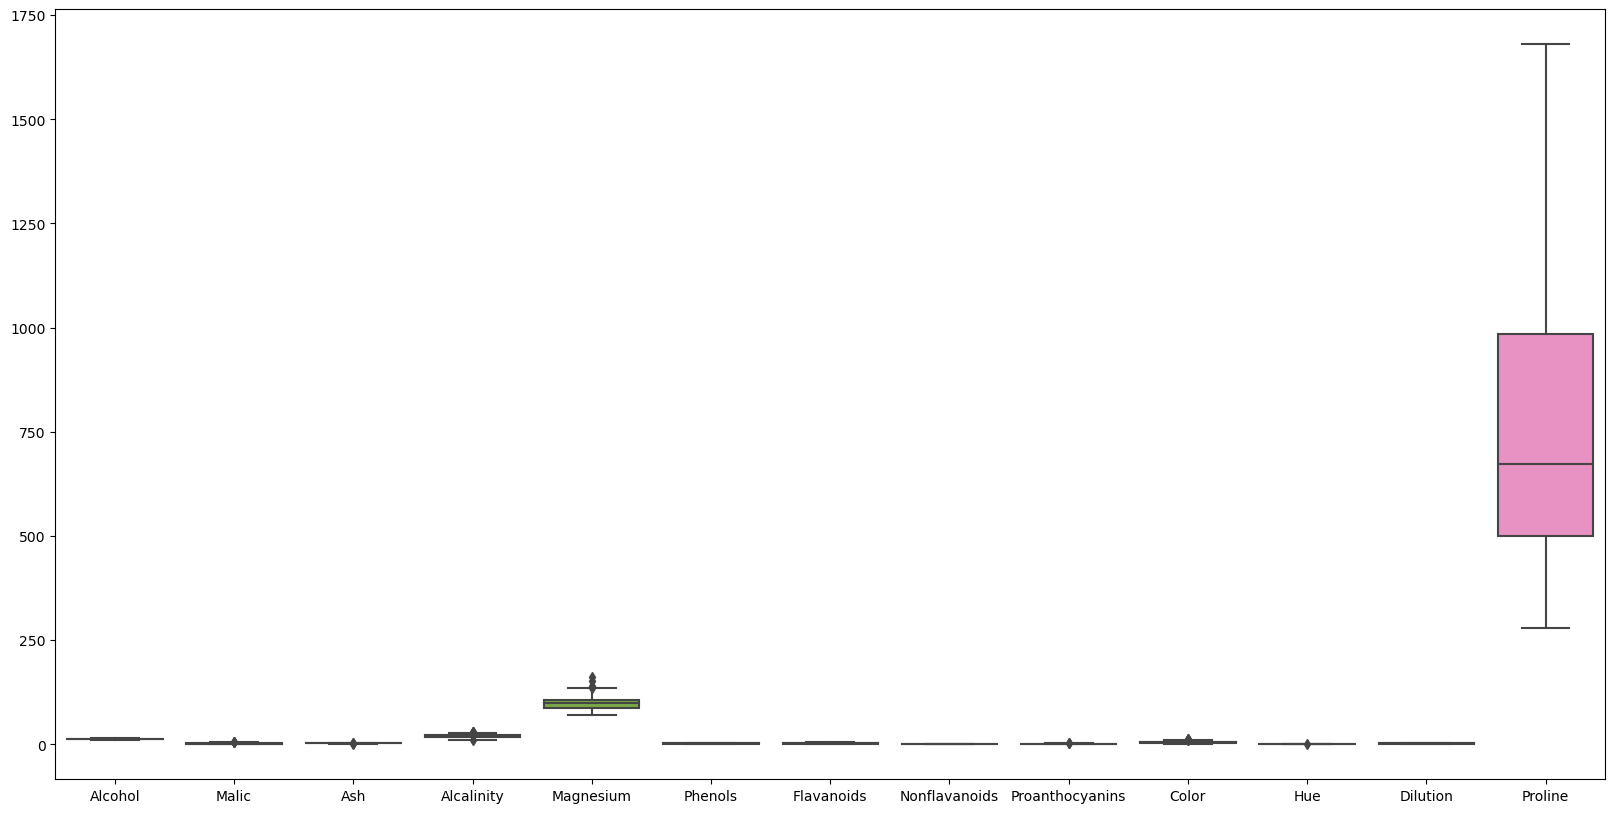

In [17]:
#outlier's detection for all the columns

plt.figure(figsize=(20,10))
sns.boxplot(data=wine_df)    

<AxesSubplot:xlabel='Magnesium'>

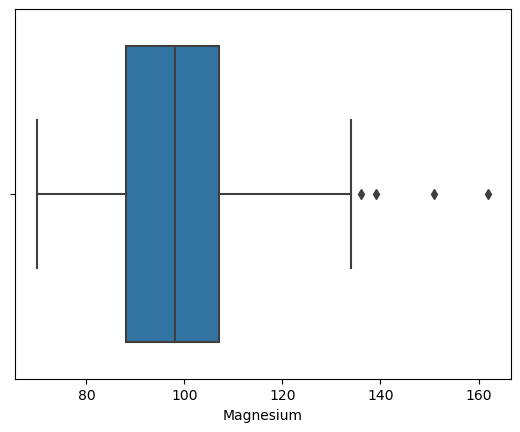

In [18]:
sns.boxplot(x='Magnesium',data=wine_df)

#### The Magnesium has four outliers.

<AxesSubplot:xlabel='Phenols', ylabel='Flavanoids'>

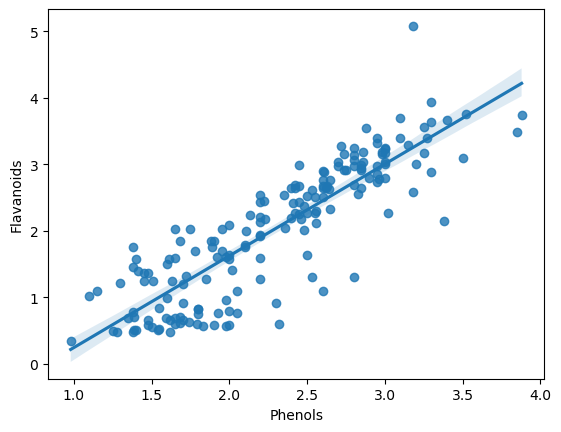

In [19]:
sns.regplot(x='Phenols',y='Flavanoids',data=wine_df)

#### Here we can clearly see that it has a positive relation beacuse one is increasing the other also increases.

In [20]:
fig = px.scatter(wine_df, x='Alcohol', y="Ash")
fig.show()

#### There is no any relation between them because it's having a neutral pattern.

In [21]:
fig = px.histogram(wine_df, x="Proline",nbins=50, histnorm='percent',barmode='overlay')
fig.show()

#### The proline between 650-699 has the highest percentage around 90.55%.And between 1650-1699 the low percentage.So, we can say that Proline level should be in the range of 650-699.

### Correlation 

In [22]:
cor=wine_df.corr()
cor

Alcohol     Malic       Ash  Alcalinity  Magnesium  \
Alcohol          1.000000  0.094397  0.211545   -0.310235   0.270798   
Malic            0.094397  1.000000  0.164045    0.288500  -0.054575   
Ash              0.211545  0.164045  1.000000    0.443367   0.286587   
Alcalinity      -0.310235  0.288500  0.443367    1.000000  -0.083333   
Magnesium        0.270798 -0.054575  0.286587   -0.083333   1.000000   
Phenols          0.289101 -0.335167  0.128980   -0.321113   0.214401   
Flavanoids       0.236815 -0.411007  0.115077   -0.351370   0.195784   
Nonflavanoids   -0.155929  0.292977  0.186230    0.361922  -0.256294   
Proanthocyanins  0.136698 -0.220746  0.009652   -0.197327   0.236441   
Color            0.546364  0.248985  0.258887    0.018732   0.199950   
Hue             -0.071747 -0.561296 -0.074667   -0.273955   0.055398   
Dilution         0.072343 -0.368710  0.003911   -0.276769   0.066004   
Proline          0.643720 -0.192011  0.223626   -0.440597   0.393351   

                  Phenols  Flavanoids  Nonflavanoids  Proanthocyanins  \
Alcohol          0.289101    0.236815      -0.155929         0.136698   
Malic           -0.335167   -0.411007       0.292977        -0.220746   
Ash              0.128980    0.115077       0.186230         0.009652   
Alcalinity      -0.321113   -0.351370       0.361922        -0.197327   
Magnesium        0.214401    0.195784      -0.256294         0.236441   
Phenols          1.000000    0.864564      -0.449935         0.612413   
Flavanoids       0.864564    1.000000      -0.537900         0.652692   
Nonflavanoids   -0.449935   -0.537900       1.000000        -0.365845   
Proanthocyanins  0.612413    0.652692      -0.365845         1.000000   
Color           -0.055136   -0.172379       0.139057        -0.025250   
Hue              0.433681    0.543479      -0.262640         0.295544   
Dilution         0.699949    0.787194      -0.503270         0.519067   
Proline          0.498115    0.494193      -0.311385         0.330417   

                    Color       Hue  Dilution   Proline  
Alcohol          0.546364 -0.071747  0.072343  0.643720  
Malic            0.248985 -0.561296 -0.368710 -0.192011  
Ash              0.258887 -0.074667  0.003911  0.223626  
Alcalinity       0.018732 -0.273955 -0.276769 -0.440597  
Magnesium        0.199950  0.055398  0.066004  0.393351  
Phenols         -0.055136  0.433681  0.699949  0.498115  
Flavanoids      -0.172379  0.543479  0.787194  0.494193  
Nonflavanoids    0.139057 -0.262640 -0.503270 -0.311385  
Proanthocyanins -0.025250  0.295544  0.519067  0.330417  
Color            1.000000 -0.521813 -0.428815  0.316100  
Hue             -0.521813  1.000000  0.565468  0.236183  
Dilution        -0.428815  0.565468  1.000000  0.312761  
Proline          0.316100  0.236183  0.312761  1.000000

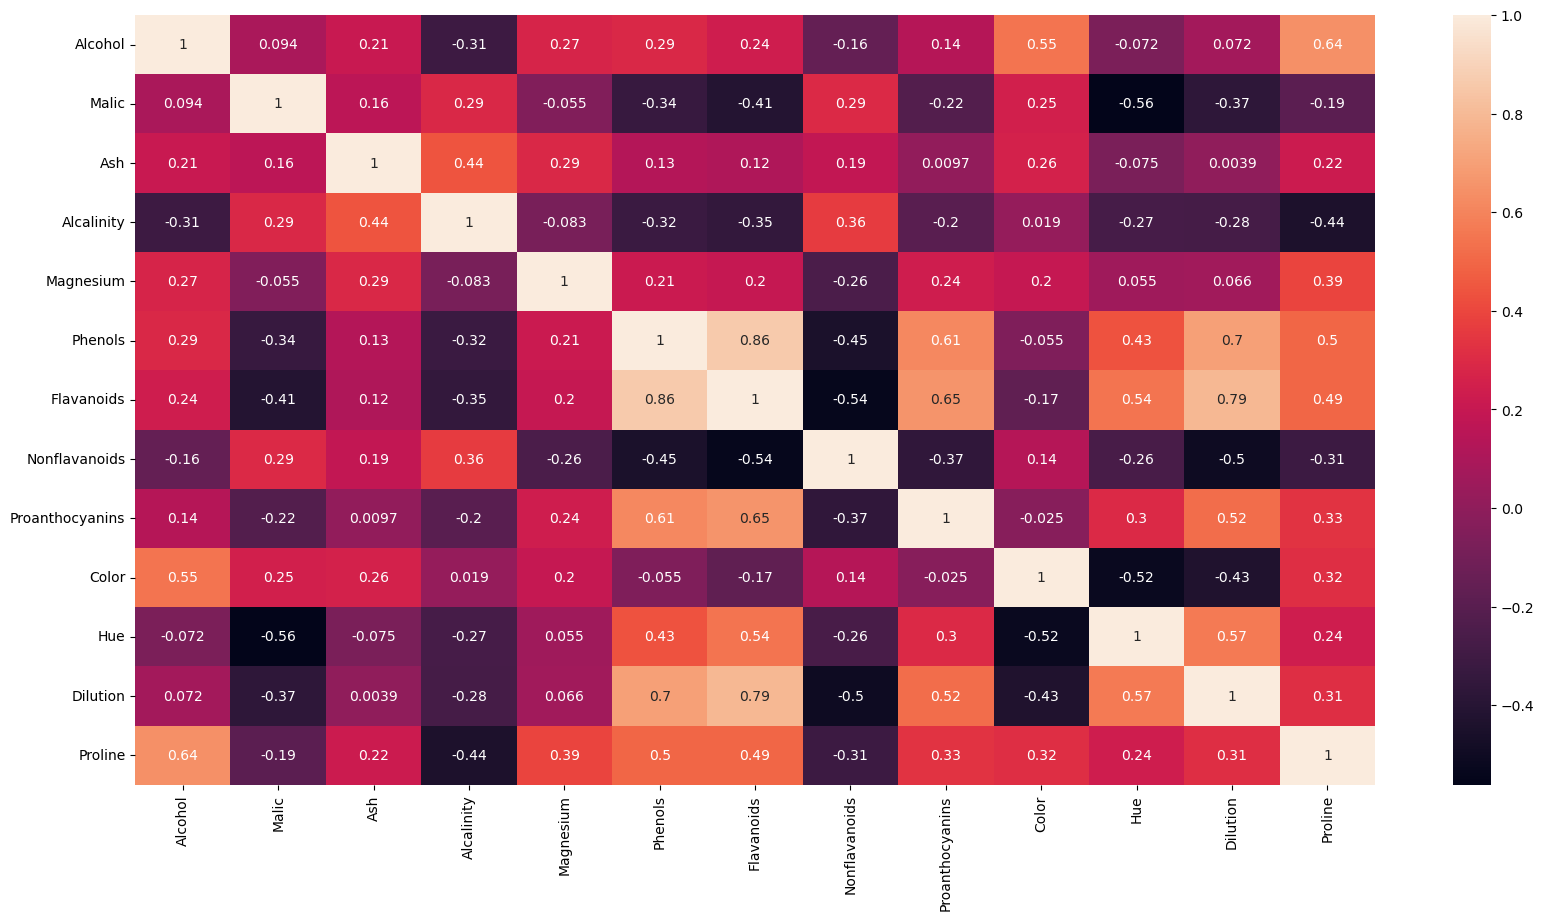

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)
plt.show()

#### Phenols and Flavanoids are high correlated to each others.

In [24]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
scaler = std.fit_transform(wine_df)
scaler

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [25]:
# Applying PCA fit transform to dataset
pca = PCA()
pca_values = pca.fit_transform(scaler)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [26]:
# PCA components matrix and covariance matrix
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [27]:
# The amount of variance that each PCA has
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [28]:
# Cumulative variance that each PCA has
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

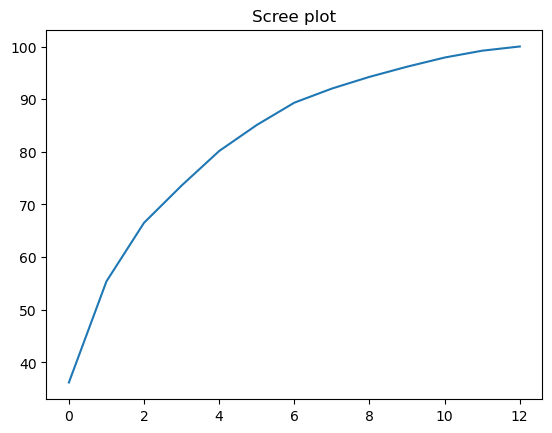

In [29]:
#scree plot gives how much the principle components gives us percentage of data is showing
#The scree plot is used to determine the number of factors to retain in an exploratory factor analysis (FA) or principal components to keep in a principal component analysis (PCA)

plt.plot(var1)
plt.title('Scree plot')
plt.show()

In [30]:
final_df=pd.concat([wine[['Type']],pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)

In [31]:
final_df.head()

Type       PC1       PC2       PC3
0     1  3.316751 -1.443463 -0.165739
1     1  2.209465  0.333393 -2.026457
2     1  2.516740 -1.031151  0.982819
3     1  3.757066 -2.756372 -0.176192
4     1  1.008908 -0.869831  2.026688

<function matplotlib.pyplot.show(close=None, block=None)>

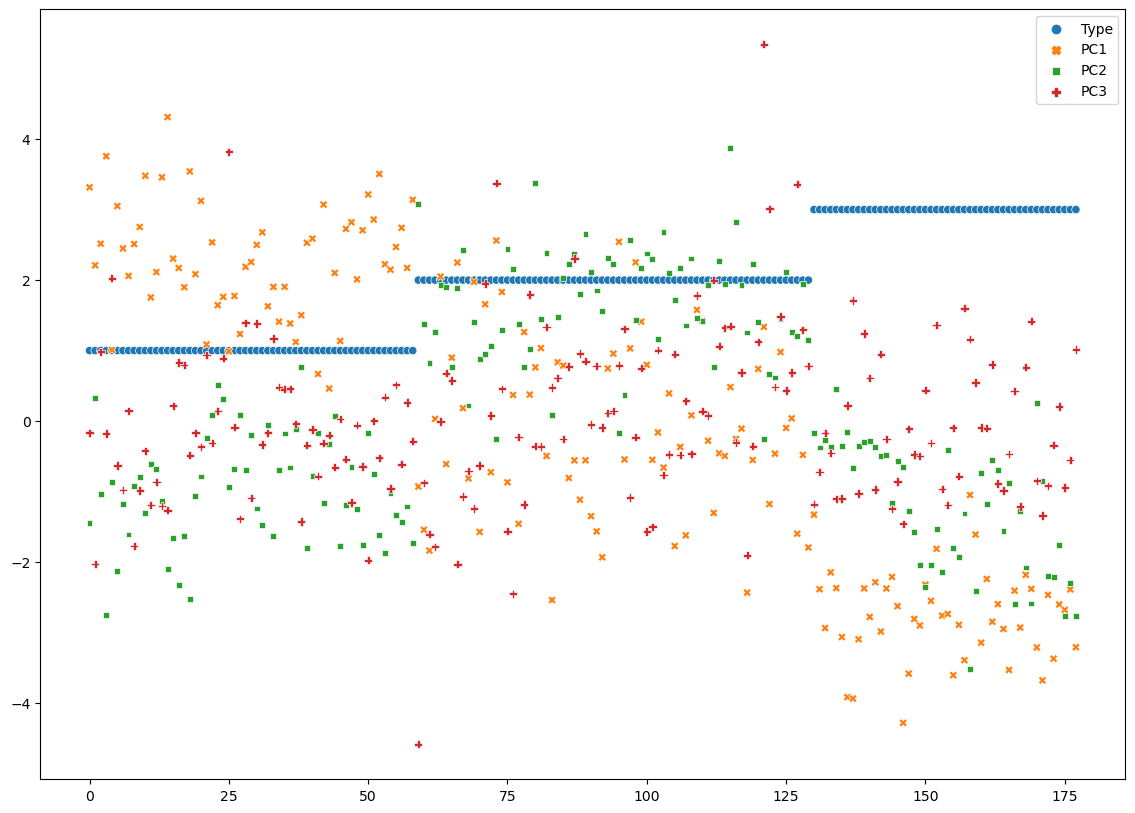

In [32]:
# Visualization of PCAs
import seaborn as sns
fig=plt.figure(figsize=(14,10))
sns.scatterplot(data=final_df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

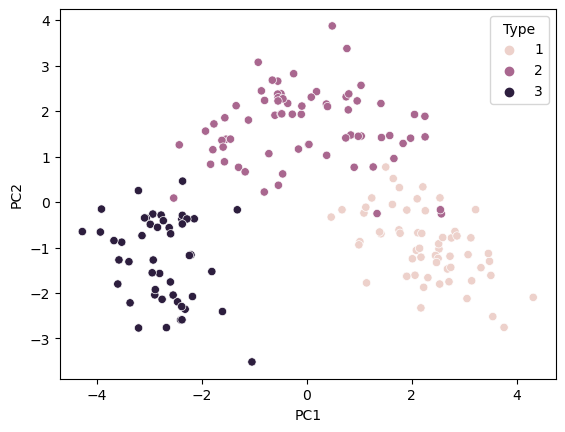

In [33]:
sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Type')
plt.show

### Checking with other Clustering Algorithms
### Hierarchical Clustering

In [34]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

<function matplotlib.pyplot.show(close=None, block=None)>

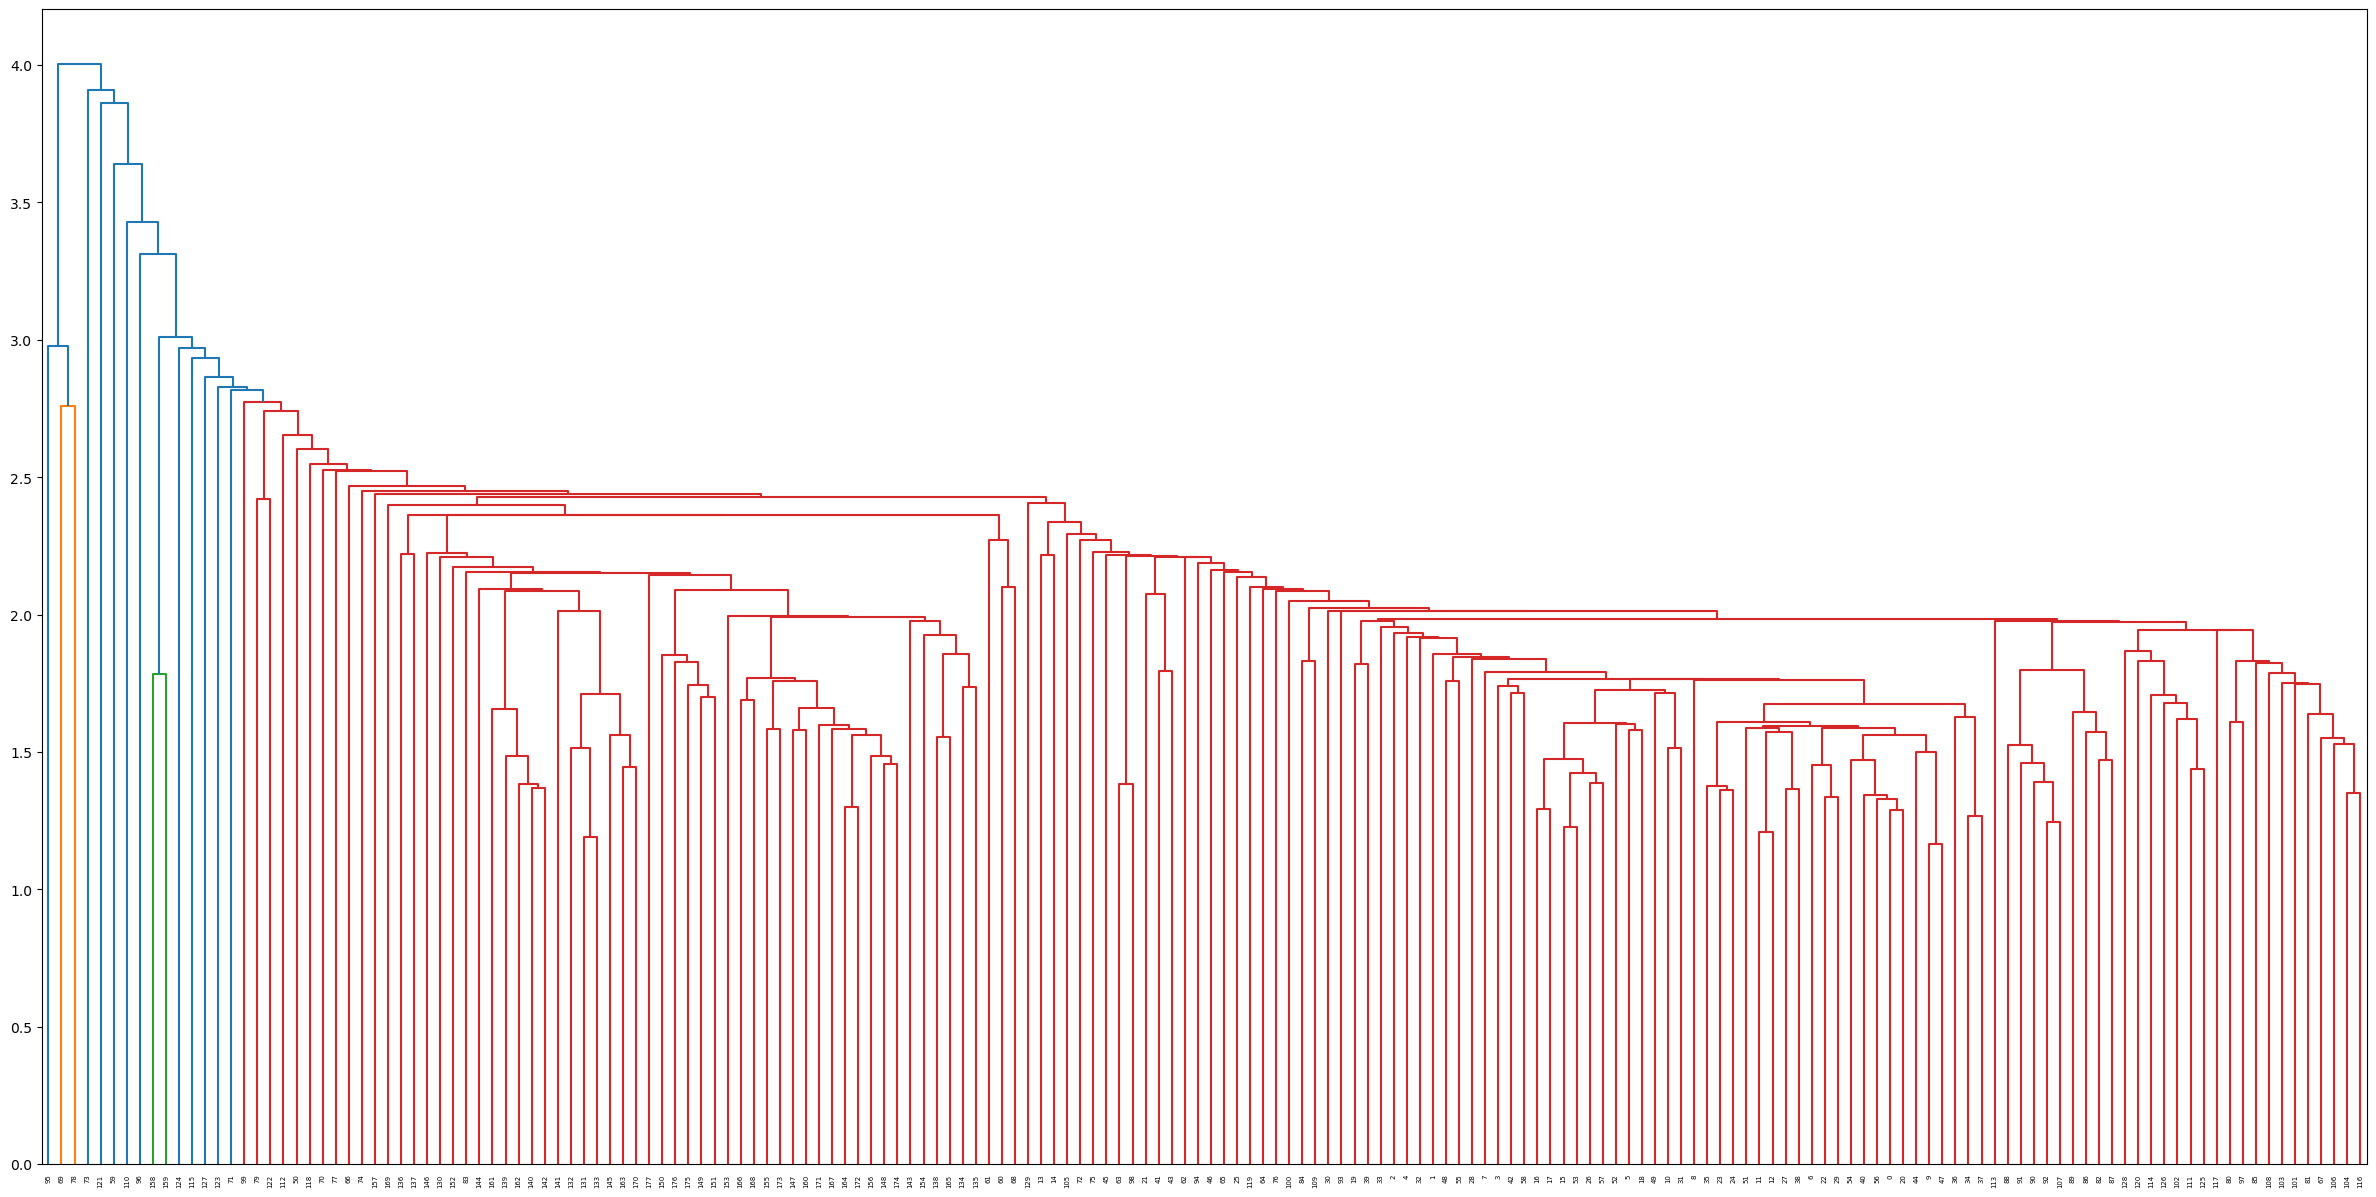

In [35]:
# creating dendogram
plt.figure(figsize=(30,15))
dendogram=sch.dendrogram(sch.linkage(scaler, method='single')) #method single calculate minimum distance between points.
plt.show

In [36]:
#now creating cluster's 
hc=AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')

In [37]:
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [38]:
# save clusters for chart
y=pd.DataFrame(hc.fit_predict(scaler),columns=['ClustersId'])
cid_values=y['ClustersId'].value_counts()
cid_values

0    173
1      3
2      1
3      1
Name: ClustersId, dtype: int64

In [39]:
# Adding clusters to dataset
wine_df1=wine.copy()
wine_df1['ClustersId']=y
wine_df1.head(100)

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0      1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1      1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2      1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3      1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4      1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..   ...      ...    ...   ...         ...        ...      ...         ...   
95     2    12.47   1.52  2.20        19.0        162     2.50        2.27   
96     2    11.81   2.12  2.74        21.5        134     1.60        0.99   
97     2    12.29   1.41  1.98        16.0         85     2.55        2.50   
98     2    12.37   1.07  2.10        18.5         88     3.52        3.75   
99     2    12.29   3.17  2.21        18.0         88     2.85        2.99   

    Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  ClustersId  
0            0.28             2.29   5.64  1.04      3.92     1065           0  
1            0.26             1.28   4.38  1.05      3.40     1050           0  
2            0.30             2.81   5.68  1.03      3.17     1185           0  
3            0.24             2.18   7.80  0.86      3.45     1480           0  
4            0.39             1.82   4.32  1.04      2.93      735           0  
..            ...              ...    ...   ...       ...      ...         ...  
95           0.32             3.28   2.60  1.16      2.63      937           1  
96           0.14             1.56   2.50  0.95      2.26      625           0  
97           0.29             1.77   2.90  1.23      2.74      428           0  
98           0.24             1.95   4.50  1.04      2.77      660           0  
99           0.45             2.81   2.30  1.42      2.83      406           0  

[100 rows x 15 columns]

<h4>Inferences:</h4> 
1.First we have normalized the data because data has varying scales. Then using dendogram we carete linkage using single method which calculate minimum distance between the two points.Using AgglomerativeClustering we create clusters.<br>
2.The Hierarchical Clustering has created in four clusters,containing the new column Clusterid.So,when the new data will come it will check the values and based on it define the cluterid.

### K-Means Clustering

In [40]:
#importing KMeans clustering library 

from sklearn.cluster import KMeans  

In [41]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

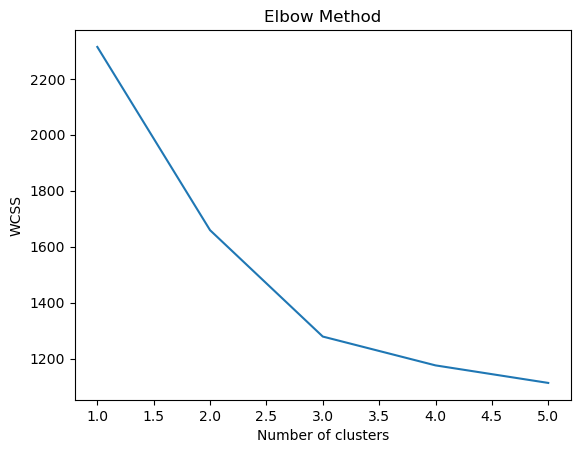

In [42]:
wcss=[]
for i in range(1,6):
    kmean=KMeans(n_clusters=i,random_state=0)
    kmean.fit(scaler)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1, 6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()    

##### By elbow method we can select the number of clusters as it is calculate Within-Cluster-Sum of Squared Errors (WSS) for different number of clusters (k)

In [43]:
#Building cluster algorithm 

new_clusters=KMeans(n_clusters=3,random_state=100) #from above elbow method we have choose number of clusters.
new_clusters.fit(scaler)

KMeans(n_clusters=3, random_state=100)

In [44]:
new_clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [45]:
# Assign clusters to the data set
wine_df3=wine.copy()
wine_df3['clustersid']=new_clusters.labels_
wine_df3.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  clustersid  
0           0.28             2.29   5.64  1.04      3.92     1065           0  
1           0.26             1.28   4.38  1.05      3.40     1050           0  
2           0.30             2.81   5.68  1.03      3.17     1185           0  
3           0.24             2.18   7.80  0.86      3.45     1480           0  
4           0.39             1.82   4.32  1.04      2.93      735           0

In [46]:
wine_df3['clustersid'].value_counts()

2    65
0    62
1    51
Name: clustersid, dtype: int64

<h4>Inferences:</h4>
First we have normalized the data because data has varying scales using StandardScaler method.Then using elbow method we have decided that how many clusters should we create for our dataset.The KMean Clustering has craeted four clusters,containing the new column Clusterid.So,when the new data will come it will check the values and based on it define the cluterid.